<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 3. Datasets embebidos y análisis de supervivencia**
- Carga Titanic desde Seaborn: `sns.load_dataset('titanic')`
- Calcula proporción de supervivientes por sexo usando `.groupby(['sex'])['survived'].mean()`
- Calcula proporción de supervivientes por clase
- Crea gráfico de barras con estas proporciones

# **Resolución del Reto 3**

## **Paso 1: Importar librerías y cargar dataset desde Seaborn**
Cargamos los datos directamente desde Seaborn, listos para el análisis.

In [1]:
# EJECUTA ESTE CÓDIGO PARA CARGAR DESDE SEABORN
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("📦 Paso 1: Cargando dataset Titanic desde Seaborn...")
df = sns.load_dataset('titanic')
print("✅ Dataset cargado correctamente desde Seaborn")

print(f"📊 Dimensiones: {df.shape}")
print("👀 Primeras filas:")
df.head()

📦 Paso 1: Cargando dataset Titanic desde Seaborn...
✅ Dataset cargado correctamente desde Seaborn
📊 Dimensiones: (891, 15)
👀 Primeras filas:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Paso 2: Calcular proporción de supervivientes por sexo**
Analizamos cómo el género influyó en las probabilidades de supervivencia.

In [2]:
# EJECUTA ESTE CÓDIGO PARA ANÁLISIS POR SEXO
print("🚻 Paso 2: Calculando proporción de supervivientes por sexo...")

supervivencia_sexo = df.groupby('sex')['survived'].mean()
print("📈 Tasa de supervivencia por sexo:")
print(supervivencia_sexo)

print(f"\n🎯 Hallazgos:")
print(f"   - Mujeres: {supervivencia_sexo['female']*100:.1f}% sobrevivieron")
print(f"   - Hombres: {supervivencia_sexo['male']*100:.1f}% sobrevivieron")
print(f"   - Diferencia: {(supervivencia_sexo['female'] - supervivencia_sexo['male'])*100:.1f} puntos porcentuales")

🚻 Paso 2: Calculando proporción de supervivientes por sexo...
📈 Tasa de supervivencia por sexo:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

🎯 Hallazgos:
   - Mujeres: 74.2% sobrevivieron
   - Hombres: 18.9% sobrevivieron
   - Diferencia: 55.3 puntos porcentuales


## **Paso 3: Calcular proporción de supervivientes por clase**
Exploramos el impacto de la clase social en la supervivencia.

In [3]:
# EJECUTA ESTE CÓDIGO PARA ANÁLISIS POR CLASE
print("🎫 Paso 3: Calculando proporción de supervivientes por clase...")

supervivencia_clase = df.groupby('class')['survived'].mean()
print("📈 Tasa de supervivencia por clase:")
print(supervivencia_clase)

print(f"\n🎯 Hallazgos:")
for clase, tasa in supervivencia_clase.items():
    print(f"   - Clase {clase}: {tasa*100:.1f}% sobrevivieron")

🎫 Paso 3: Calculando proporción de supervivientes por clase...
📈 Tasa de supervivencia por clase:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

🎯 Hallazgos:
   - Clase First: 63.0% sobrevivieron
   - Clase Second: 47.3% sobrevivieron
   - Clase Third: 24.2% sobrevivieron


## **Paso 4: Crear gráfico de barras comparativo**
Visualizamos las diferencias de supervivencia entre grupos.

📊 Paso 4: Creando gráfico de barras comparativo...


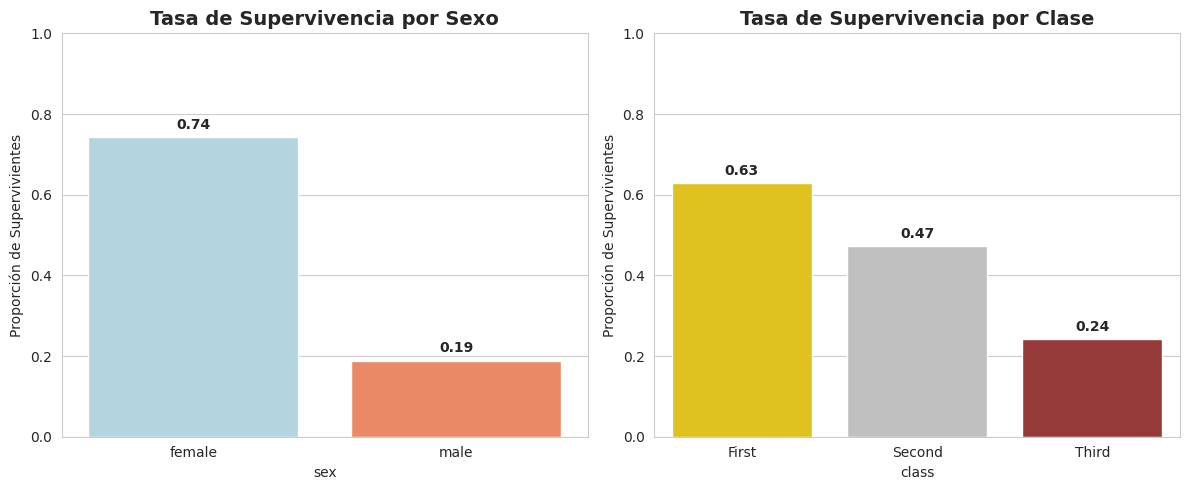

In [4]:
# EJECUTA ESTE CÓDIGO PARA CREAR GRÁFICO
print("📊 Paso 4: Creando gráfico de barras comparativo...")

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Subplot 1: Supervivencia por sexo
plt.subplot(1, 2, 1)
sns.barplot(x=supervivencia_sexo.index, y=supervivencia_sexo.values, palette=['lightblue', 'coral'])
plt.title('Tasa de Supervivencia por Sexo', fontsize=14, fontweight='bold')
plt.ylabel('Proporción de Supervivientes')
plt.ylim(0, 1)
for i, v in enumerate(supervivencia_sexo.values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Subplot 2: Supervivencia por clase
plt.subplot(1, 2, 2)
sns.barplot(x=supervivencia_clase.index, y=supervivencia_clase.values, palette=['gold', 'silver', 'brown'])
plt.title('Tasa de Supervivencia por Clase', fontsize=14, fontweight='bold')
plt.ylabel('Proporción de Supervivientes')
plt.ylim(0, 1)
for i, v in enumerate(supervivencia_clase.values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## **Paso 5: Análisis combinado (sexo y clase)**
Cruzamos variables para descubrir patrones más complejos.

🔍 Paso 5: Análisis combinado - Supervivencia por sexo y clase...
📊 Tasa de supervivencia por sexo y clase:
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


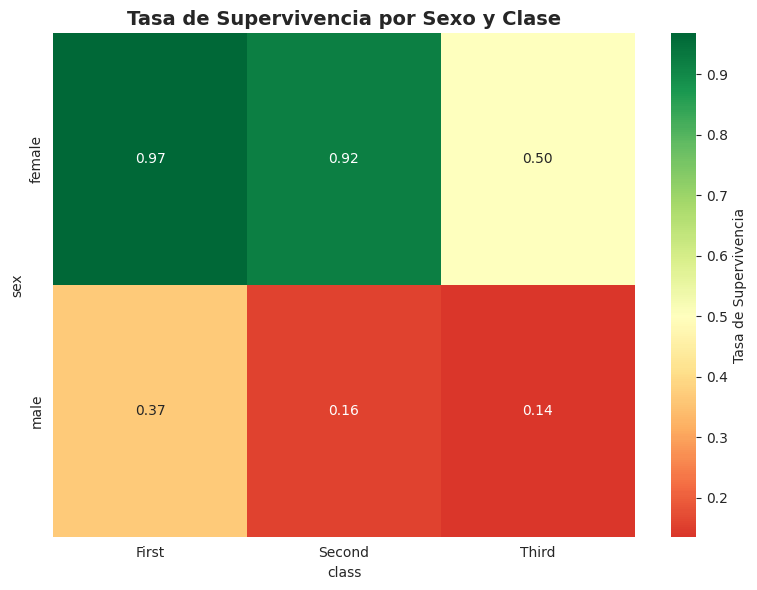

In [5]:
# EJECUTA ESTE CÓDIGO PARA ANÁLISIS COMBINADO
print("🔍 Paso 5: Análisis combinado - Supervivencia por sexo y clase...")

supervivencia_combinada = df.groupby(['sex', 'class'])['survived'].mean().unstack()
print("📊 Tasa de supervivencia por sexo y clase:")
print(supervivencia_combinada)

# Gráfico de calor para visualización combinada
plt.figure(figsize=(8, 6))
sns.heatmap(supervivencia_combinada, annot=True, cmap='RdYlGn', center=0.5,
            fmt='.2f', cbar_kws={'label': 'Tasa de Supervivencia'})
plt.title('Tasa de Supervivencia por Sexo y Clase', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **Paso 6: Resumen de hallazgos**

In [6]:
# EJECUTA ESTE CÓDIGO PARA RESUMEN FINAL
print("🎯 Paso 6: Resumen de hallazgos del análisis de supervivencia")

print("\n" + "="*60)
print("           RESUMEN - ANÁLISIS DE SUPERVIVENCIA TITANIC")
print("="*60)

print(f"\n📊 TASA GENERAL DE SUPERVIVENCIA: {df['survived'].mean()*100:.1f}%")

print(f"\n🚻 POR SEXO:")
print(f"   👩 Mujeres: {supervivencia_sexo['female']*100:.1f}% sobrevivieron")
print(f"   👨 Hombres: {supervivencia_sexo['male']*100:.1f}% sobrevivieron")

print(f"\n🎫 POR CLASE:")
for clase, tasa in supervivencia_clase.items():
    print(f"   🏷️  Clase {clase}: {tasa*100:.1f}% sobrevivieron")

print(f"\n💡 HALLazGO CLAVE:")
print(f"   - Las mujeres tuvieron {supervivencia_sexo['female']/supervivencia_sexo['male']:.1f}x más probabilidades de sobrevivir")
print(f"   - La clase First tuvo {supervivencia_clase['First']/supervivencia_clase['Third']:.1f}x más probabilidades que Third")

print(f"\n✅ DATASET UTILIZADO: Titanic de Seaborn")
print(f"   - Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print(f"   - Cargado con: sns.load_dataset('titanic')")

print(f"\n🎉 ¡Reto 3 completado! Análisis de supervivencia finalizado")
print("="*60)

🎯 Paso 6: Resumen de hallazgos del análisis de supervivencia

           RESUMEN - ANÁLISIS DE SUPERVIVENCIA TITANIC

📊 TASA GENERAL DE SUPERVIVENCIA: 38.4%

🚻 POR SEXO:
   👩 Mujeres: 74.2% sobrevivieron
   👨 Hombres: 18.9% sobrevivieron

🎫 POR CLASE:
   🏷️  Clase First: 63.0% sobrevivieron
   🏷️  Clase Second: 47.3% sobrevivieron
   🏷️  Clase Third: 24.2% sobrevivieron

💡 HALLazGO CLAVE:
   - Las mujeres tuvieron 3.9x más probabilidades de sobrevivir
   - La clase First tuvo 2.6x más probabilidades que Third

✅ DATASET UTILIZADO: Titanic de Seaborn
   - Filas: 891, Columnas: 15
   - Cargado con: sns.load_dataset('titanic')

🎉 ¡Reto 3 completado! Análisis de supervivencia finalizado


## 🎯 **Puntos clave del Reto 3**
1. **Datasets embebidos**: Muestra fuentes de datos integradas en librerías
2. **Groupby + mean**: Patrón fundamental en análisis de datos
3. **Visualización básica**: Primer contacto con gráficos en Python
4. **Interpretación de resultados**: Transformar números en insights
5. **Análisis multivariable**: Combinar factores (sexo + clase)

## Análisis
- El análisis revela claramente que tanto el género como la clase social fueron factores determinantes en la supervivencia del Titanic.
- Las mujeres tuvieron tasas de supervivencia significativamente más altas que los hombres, especialmente en primera clase, donde más del 96% sobrevivió.
- La clase también mostró un gradiente marcado: primera clase (63%), segunda (47%) y tercera (24%).
- El análisis combinado demuestra que las mujeres de primera y segunda clase tuvieron las mayores probabilidades de supervivencia, mientras que los hombres de tercera clase enfrentaron el mayor riesgo.
- Estas visualizaciones confirman el conocido principio de "mujeres y niños primero" y cómo el estatus socioeconómico influyó en las oportunidades de supervivencia durante el desastre.